#Importing Important Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

#Reading Data

In [ ]:
df = pd.read_csv("CustomerData.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## Basic Understanding over Data

In [ ]:
df.shape

(8950, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Checking for null values and Imputation

In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# filling missing values with mean in the dataset
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())

In [ ]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

# Exploratory Data Analysis

##Relational Graph : Scatter Plot

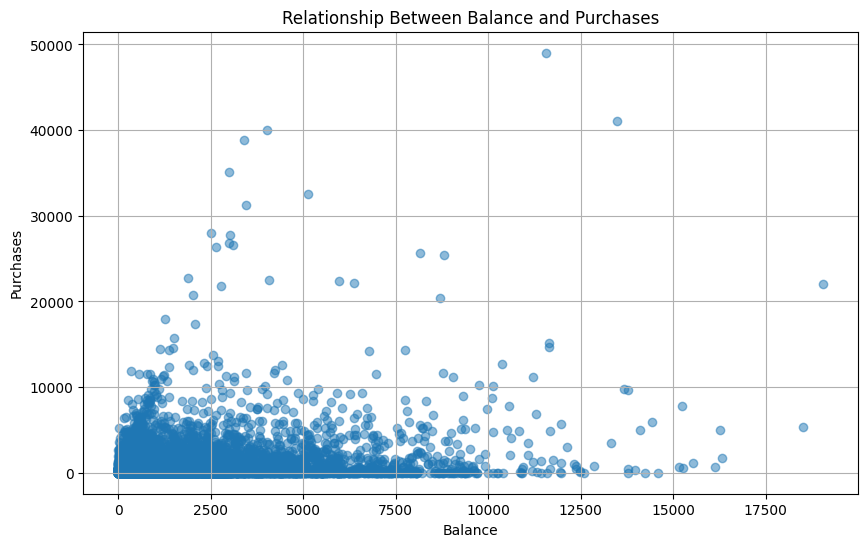

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.scatter(df['BALANCE'], df['PURCHASES'], alpha=0.5)  # Alpha is set to 0.5 for better visibility of point overlap

plt.title('Relationship Between Balance and Purchases')  # Title of the graph
plt.xlabel('Balance')  # X-axis label
plt.ylabel('Purchases')  # Y-axis label
plt.grid(True)  # Adding grid for better readability of scales

# Optional: Highlight specific points or trends if necessary
# for example, plt.annotate('Special Point', xy=(value1, value2), xytext=(value1, value2+100),
#             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

## Categorical Graph: Bar Chart

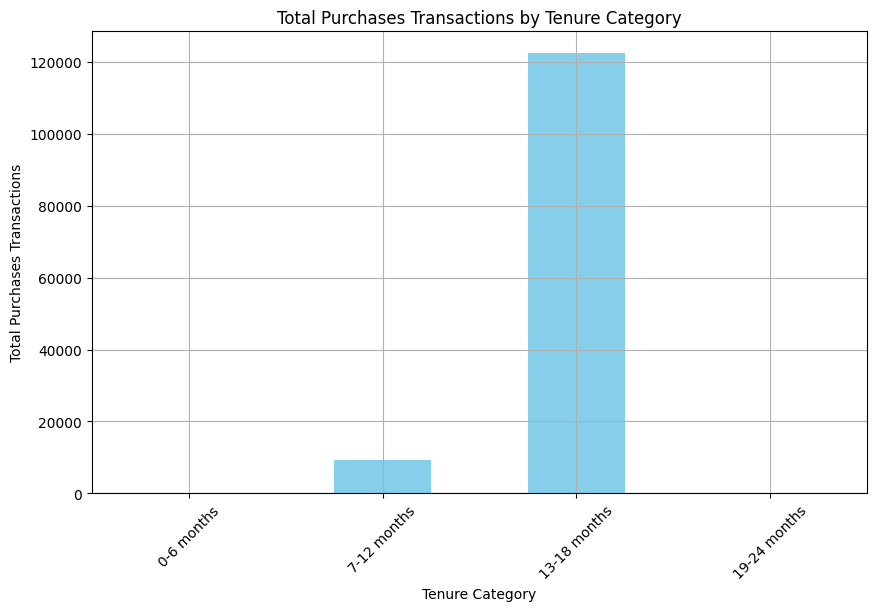

In [ ]:
# Create a new categorical column 'Tenure Category' based on 'TENURE'
df['Tenure Category'] = pd.cut(df['TENURE'], bins=[0, 6, 12, 18, 24], labels=['0-6 months', '7-12 months', '13-18 months', '19-24 months'], right=False)

# Group data by 'Tenure Category' and sum up 'PURCHASES_TRX'
category_sum = df.groupby('Tenure Category')['PURCHASES_TRX'].sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
category_sum.plot(kind='bar', color='skyblue')  # You can choose any color that suits your preference
plt.title('Total Purchases Transactions by Tenure Category')
plt.xlabel('Tenure Category')
plt.ylabel('Total Purchases Transactions')
plt.xticks(rotation=45)  # Rotates labels to prevent overlap
plt.grid(True)

plt.show()

## Statistical Graph : Correlational HeatMap

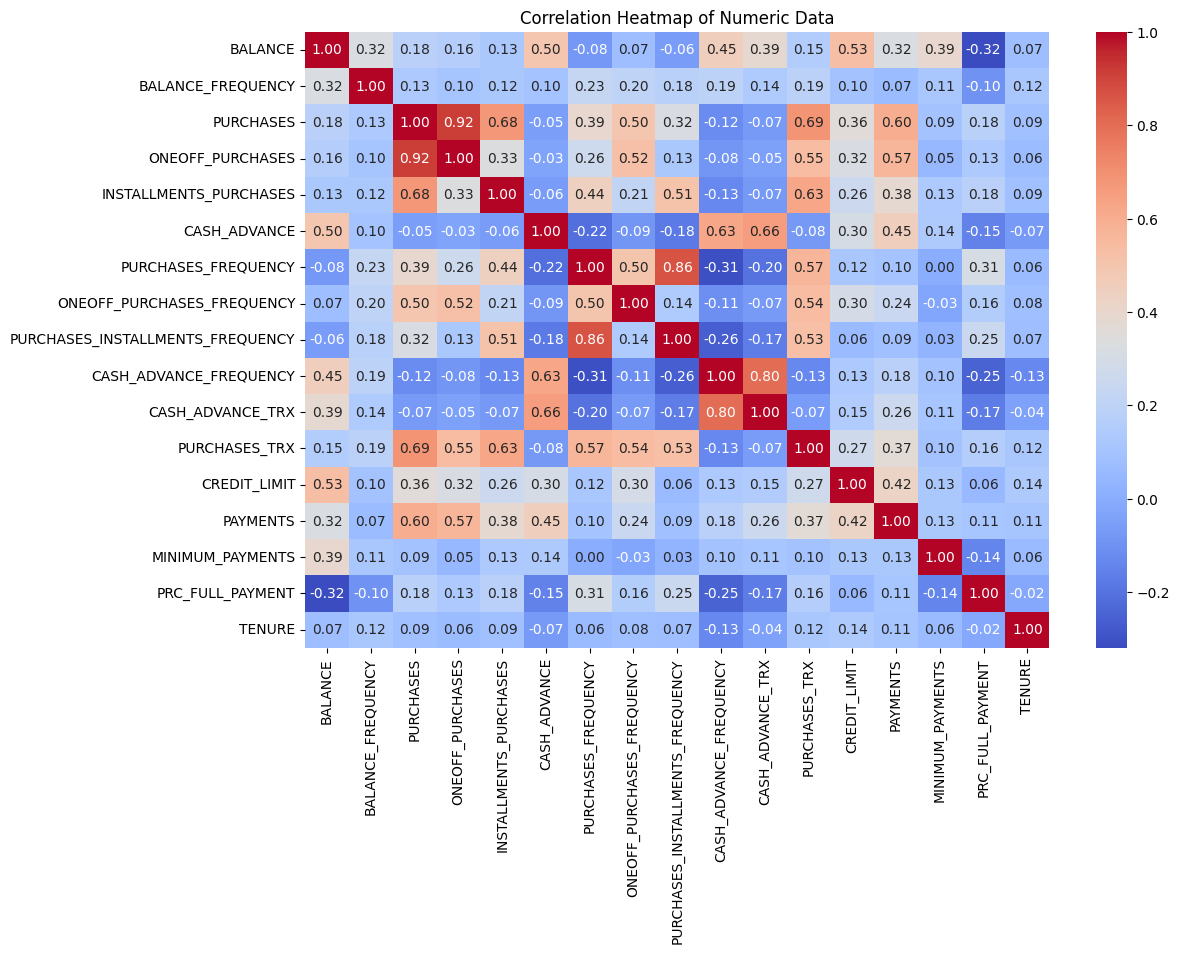

In [ ]:
# Select only the numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Data')
plt.xticks(rotation=90)  # Rotates x-axis labels to prevent overlap
plt.yticks(rotation=0)  # Ensures y-axis labels are horizontal for better readability
plt.show()

# Descriptive Statistics

In [ ]:
# Calculate and display mean
print("\nMean of the dataset:")
numeric_df.mean()


Mean of the dataset:


BALANCE                             1564.474828
BALANCE_FREQUENCY                      0.877271
PURCHASES                           1003.204834
ONEOFF_PURCHASES                     592.437371
INSTALLMENTS_PURCHASES               411.067645
CASH_ADVANCE                         978.871112
PURCHASES_FREQUENCY                    0.490351
ONEOFF_PURCHASES_FREQUENCY             0.202458
PURCHASES_INSTALLMENTS_FREQUENCY       0.364437
CASH_ADVANCE_FREQUENCY                 0.135144
CASH_ADVANCE_TRX                       3.248827
PURCHASES_TRX                         14.709832
CREDIT_LIMIT                        4494.449450
PAYMENTS                            1733.143852
MINIMUM_PAYMENTS                     864.206542
PRC_FULL_PAYMENT                       0.153715
TENURE                                11.517318
dtype: float64

In [ ]:
# Calculate and display median
print("\nMedian of the dataset:")
numeric_df.median()


Median of the dataset:


BALANCE                              873.385231
BALANCE_FREQUENCY                      1.000000
PURCHASES                            361.280000
ONEOFF_PURCHASES                      38.000000
INSTALLMENTS_PURCHASES                89.000000
CASH_ADVANCE                           0.000000
PURCHASES_FREQUENCY                    0.500000
ONEOFF_PURCHASES_FREQUENCY             0.083333
PURCHASES_INSTALLMENTS_FREQUENCY       0.166667
CASH_ADVANCE_FREQUENCY                 0.000000
CASH_ADVANCE_TRX                       0.000000
PURCHASES_TRX                          7.000000
CREDIT_LIMIT                        3000.000000
PAYMENTS                             856.901546
MINIMUM_PAYMENTS                     335.628312
PRC_FULL_PAYMENT                       0.000000
TENURE                                12.000000
dtype: float64

In [ ]:
# Calculate and display standard deviation
print("\nStandard Deviation of the dataset:")
numeric_df.std()


Standard Deviation of the dataset:


BALANCE                             2081.531879
BALANCE_FREQUENCY                      0.236904
PURCHASES                           2136.634782
ONEOFF_PURCHASES                    1659.887917
INSTALLMENTS_PURCHASES               904.338115
CASH_ADVANCE                        2097.163877
PURCHASES_FREQUENCY                    0.401371
ONEOFF_PURCHASES_FREQUENCY             0.298336
PURCHASES_INSTALLMENTS_FREQUENCY       0.397448
CASH_ADVANCE_FREQUENCY                 0.200121
CASH_ADVANCE_TRX                       6.824647
PURCHASES_TRX                         24.857649
CREDIT_LIMIT                        3638.612411
PAYMENTS                            2895.063757
MINIMUM_PAYMENTS                    2330.588021
PRC_FULL_PAYMENT                       0.292499
TENURE                                 1.338331
dtype: float64

In [ ]:
# Calculate and display skewness
print("\nSkewness of the dataset:")
numeric_df.skew()


Skewness of the dataset:


BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522549
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.867357
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

In [ ]:
# Calculate and display kurtosis
print("\nKurtosis of the dataset:")
numeric_df.kurtosis()


Kurtosis of the dataset:


BALANCE                               7.674751
BALANCE_FREQUENCY                     3.092370
PURCHASES                           111.388771
ONEOFF_PURCHASES                    164.187572
INSTALLMENTS_PURCHASES               96.575178
CASH_ADVANCE                         52.899434
PURCHASES_FREQUENCY                  -1.638631
ONEOFF_PURCHASES_FREQUENCY            1.161846
PURCHASES_INSTALLMENTS_FREQUENCY     -1.398632
CASH_ADVANCE_FREQUENCY                3.334734
CASH_ADVANCE_TRX                     61.646862
PURCHASES_TRX                        34.793100
CREDIT_LIMIT                          2.837308
PAYMENTS                             54.770736
MINIMUM_PAYMENTS                    294.384393
PRC_FULL_PAYMENT                      2.432395
TENURE                                7.694823
dtype: float64

In [ ]:
# Display basic descriptive statistics
print("Basic Descriptive Statistics:")
df.describe().T

Basic Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


# Pre-Processing

## Scaling

In [ ]:
scalar = StandardScaler()
scaled_df = scalar.fit_transform(numeric_df)

In [ ]:
# Elbow method
inertia = []
silhouette_scores = []
K = range(2, 11)  # Typically start with 2 clusters up to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))

In [ ]:
## Elbow Method

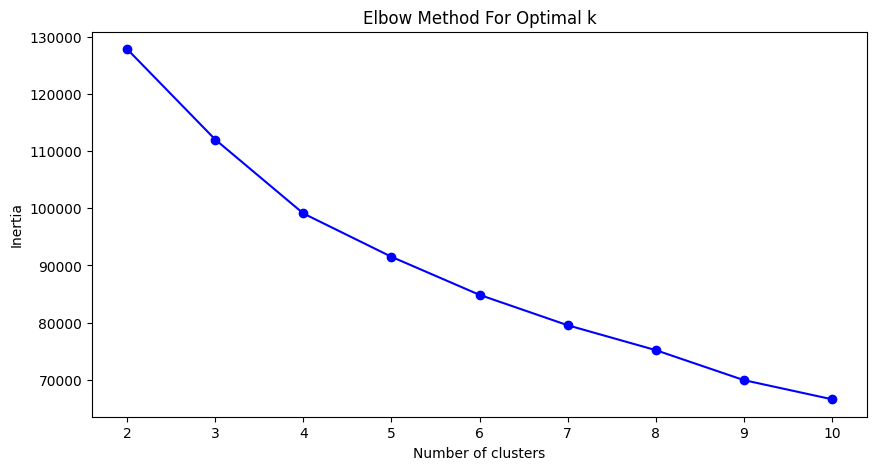

In [ ]:
# Plotting the elbow graph for inertia
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

#Silhoutte Scores

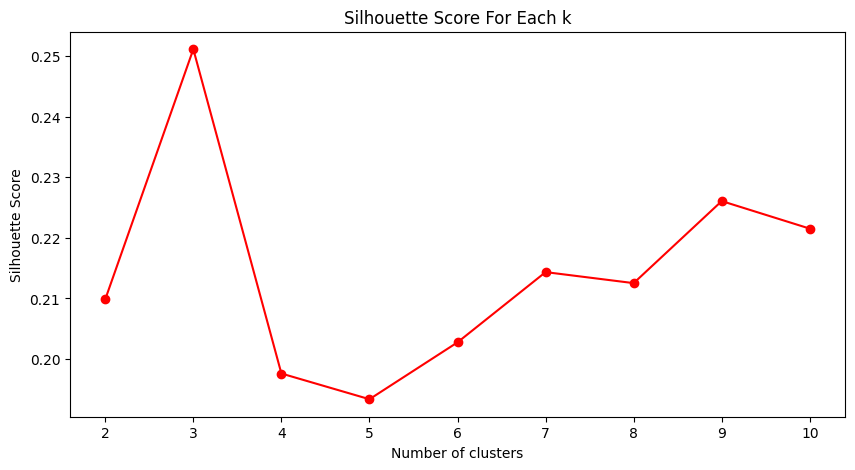

In [ ]:
# Plotting the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, 'ro-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Each k')
plt.show()

#Clustering

In [ ]:
# Choose the optimal number of clusters, let's say 3 based on the above analysis
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=10)
cluster_labels = kmeans.fit_predict(scaled_df)

# Adding cluster labels to the original dataframe for visualization
df['Cluster'] = cluster_labels

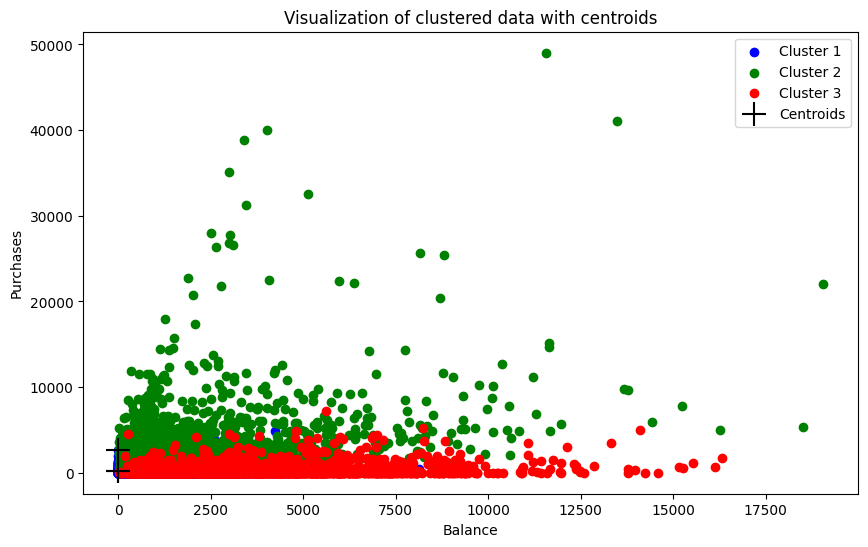

In [ ]:
# Plotting clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['BALANCE'][df.Cluster == 0], df['PURCHASES'][df.Cluster == 0], c='blue', label='Cluster 1')
plt.scatter(df['BALANCE'][df.Cluster == 1], df['PURCHASES'][df.Cluster == 1], c='green', label='Cluster 2')
plt.scatter(df['BALANCE'][df.Cluster == 2], df['PURCHASES'][df.Cluster == 2], c='red', label='Cluster 3')

# Plotting centroids
centroids = scalar.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 1], centroids[:, 3], s=300, c='black', marker='+', label='Centroids')

plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.title('Visualization of clustered data with centroids')
plt.legend()
plt.show()

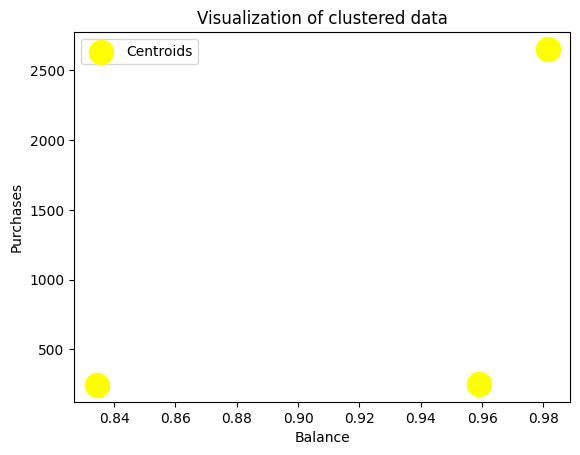

In [ ]:
# Plotting centroids
centroids = scalar.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 1], centroids[:, 3], s=300, c='yellow', label='Centroids')
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.title('Visualization of clustered data')
plt.legend()
plt.show()

#Predictive Modeling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Drop the 'CUST_ID' column
features = numeric_df

# Apply scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [ ]:
# Preparing the independent variables (scaled features) and the dependent variable (cluster labels)
X = scaled_features
y = df['Cluster']

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
# Predicting the cluster labels for the test set
y_pred = model.predict(X_test)

#Scores

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9955307262569832


In [ ]:
# Generate and print the confusion matrix
confusion_matrix(y_test, y_pred)

array([[1215,    1,    1],
       [   3,  273,    0],
       [   3,    0,  294]])

In [ ]:
# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1217
           1       1.00      0.99      0.99       276
           2       1.00      0.99      0.99       297

    accuracy                           1.00      1790
   macro avg       1.00      0.99      0.99      1790
weighted avg       1.00      1.00      1.00      1790



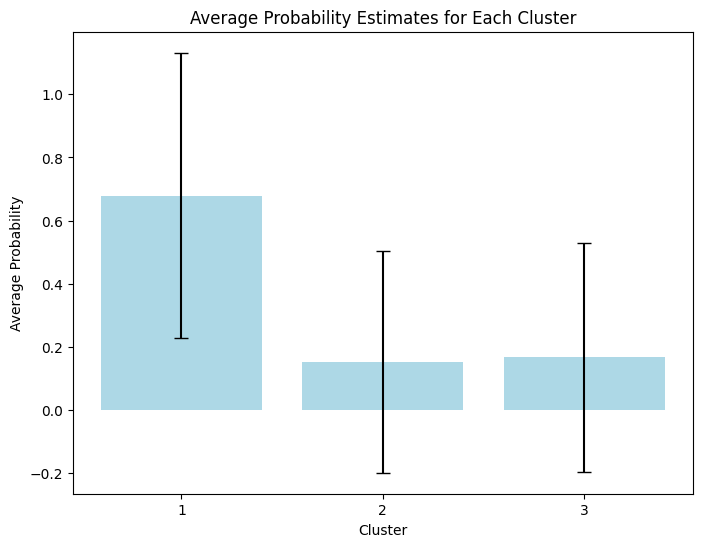

In [ ]:
# Predicting the probability estimates for each cluster in the test set
probabilities = model.predict_proba(X_test)

# Calculate the mean and standard deviation for probabilities of each cluster
mean_probabilities = np.mean(probabilities, axis=0)
std_probabilities = np.std(probabilities, axis=0)

# Plotting
plt.figure(figsize=(8, 6))
clusters = range(1, len(mean_probabilities) + 1)
plt.bar(clusters, mean_probabilities, yerr=std_probabilities, capsize=5, color='lightblue')
plt.title('Average Probability Estimates for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Probability')
plt.xticks(clusters)
plt.show()